In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from multiclass_metrics import ClassificationMetrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from models_2 import LDA, LogisticRegressionMulticlass, DecisionTree, RandomForest, DataSampler
sys.path.append(os.path.abspath('../..'))
from data_splitting import train_val_split
from preprocessing import normalize

df = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_2/data/raw/diabetes_dev.csv')
df_test = pd.read_csv('/home/facuvulcano/Machine-Learning/Vulcano_Facundo_TP3/Problema_2/data/raw/diabetes_test.csv')

In [2]:
sampler = DataSampler(df)
balanced_df = sampler.oversampling()

In [3]:
X_train, X_val, y_train, y_val = train_val_split(balanced_df, 'Diabetes')
X_test = df_test.drop(columns=['Diabetes'])
y_test = df_test['Diabetes']

In [4]:
for feature in X_train.columns:
    min_val = X_train[feature].min()
    max_val = X_train[feature].max()
    X_train[feature] = normalize(X_train, feature, min_val, max_val, [0, 1])
    X_val[feature] = normalize(X_val, feature, min_val, max_val, [0, 1])
    X_test[feature] = normalize(X_test, feature, min_val, max_val, [0, 1])


## **LDA**

## **Multiclass Logistic Regression**

In [5]:
lrm = LogisticRegressionMulticlass()
lrm.fit(X_train, y_train)
predictions_lrm, probabilities_lrm = lrm.predict_classes(X_val.values)

Outer Iteration:   0%|          | 0/10000 [00:00<?, ?iteration/s]

Convergence reached at iteration 0


accuracy class 0: 0.35367577527125965
preccision class 0: 0.4141637685741385
recall class 0: 0.11521885719311618
f-score class 0: 0.18028349924308454
auc-pre class 0: 0.37098408965081703
auc-roc class 0: 0.5687262746562264


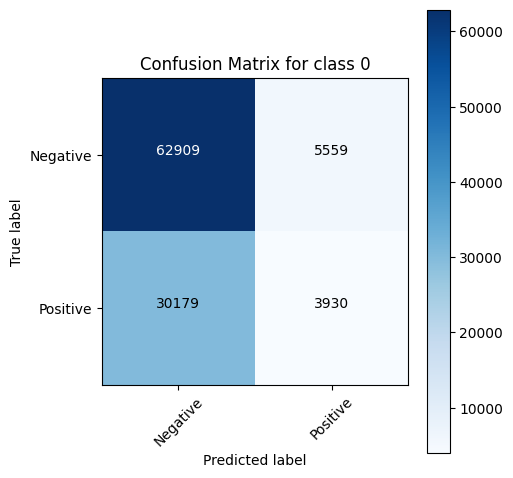

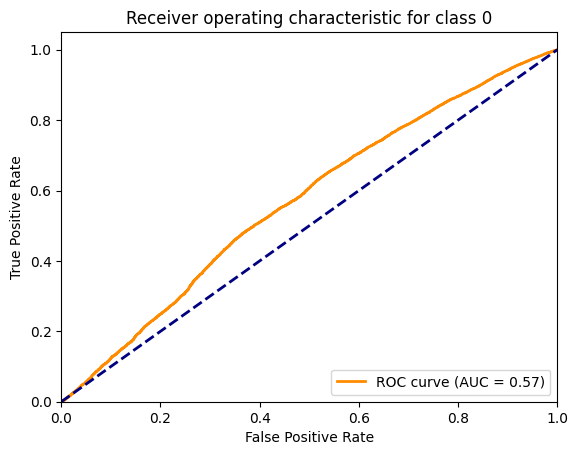

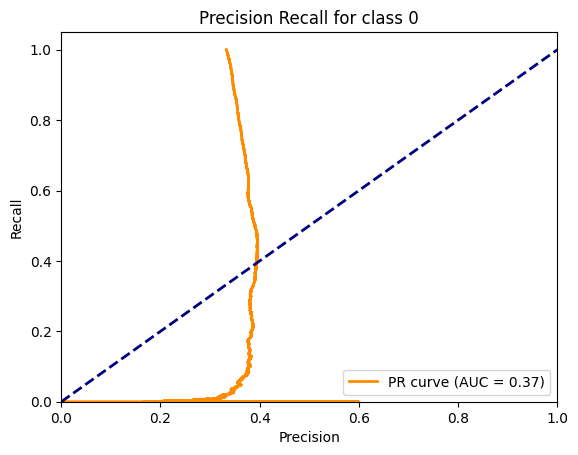

accuracy class 1: 0.35367577527125965
preccision class 1: 0.0
recall class 1: 0.0
f-score class 1: 0.0
auc-pre class 1: 0.31963198672161175
auc-roc class 1: 0.4803287013595937


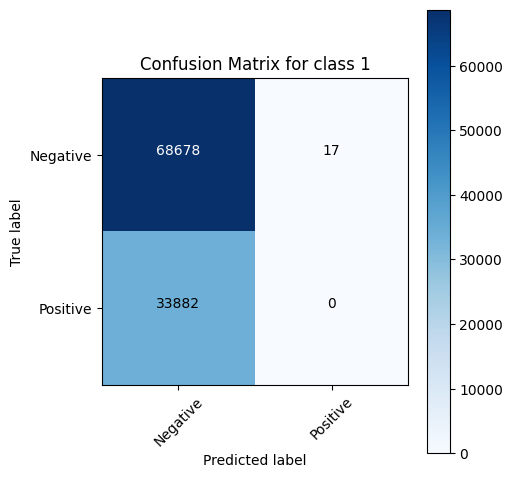

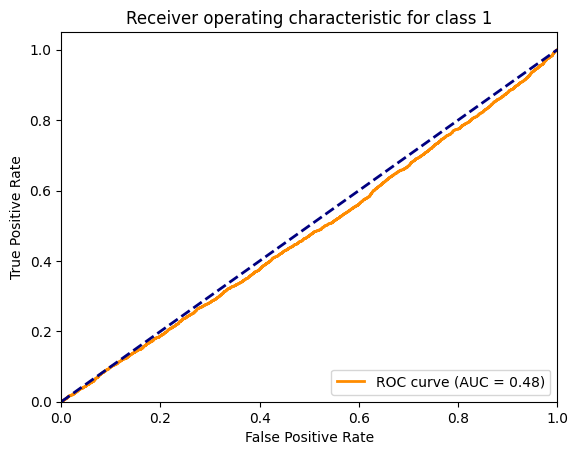

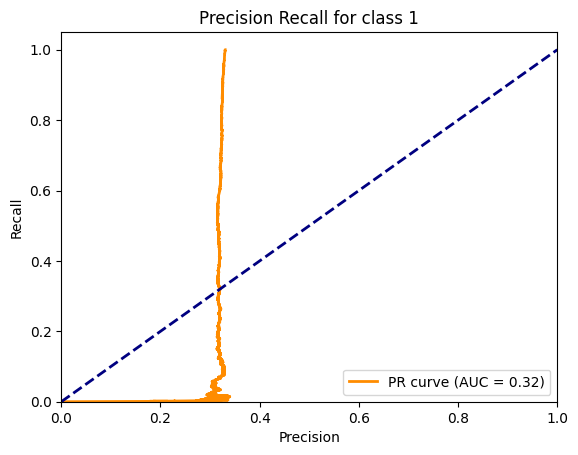

accuracy class 2: 0.35367577527125965
preccision class 2: 0.34757335797401984
recall class 2: 0.9353206499739779
f-score class 2: 0.5068112206929507
auc-pre class 2: 0.42725291113254815
auc-roc class 2: 0.601092086239439


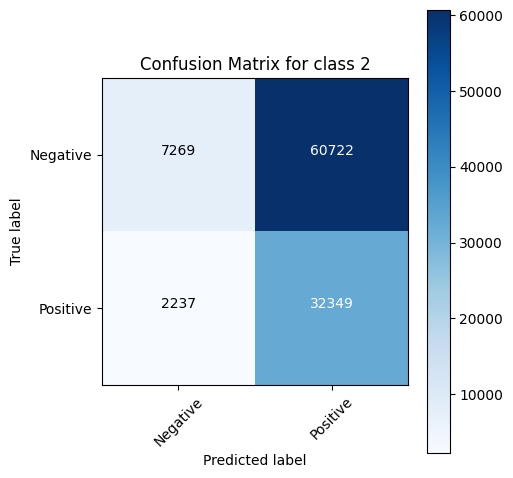

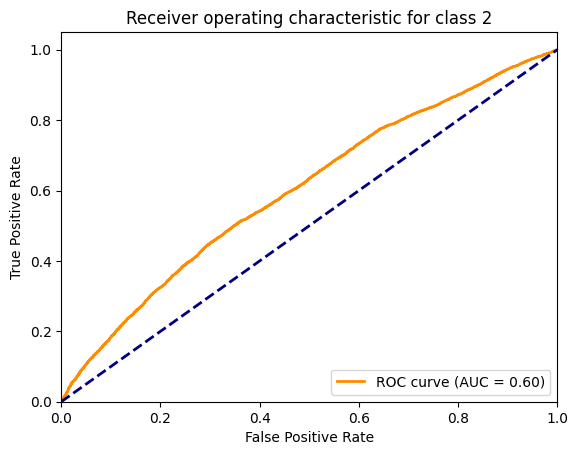

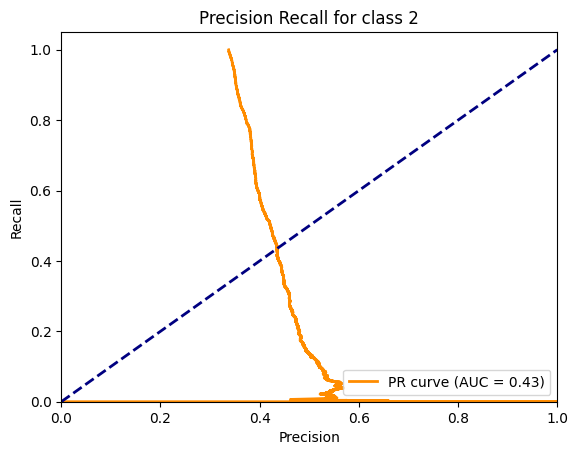

In [6]:
class_metrics = {}

for i in range(3):
    metrics = ClassificationMetrics(y_val, predictions_lrm, i, probabilities_lrm)
    acc = metrics.accuracy()
    prec = metrics.precision()
    recc = metrics.recall()
    f_score = metrics.f_score()
    auc_pr, _, _ = metrics.auc_pr()
    auc_roc, _, _ = metrics.auc_roc()

    class_metrics[i] = {
        'accuracy' : acc,
        'precision' : prec,
        'recall' : recc,
        'f_score' : f_score,
        'auc_pr' : auc_pr,
        'auc_roc' : auc_roc
        }
    
    print(f'accuracy class {i}: {acc}')
    print(f'preccision class {i}: {prec}')
    print(f'recall class {i}: {recc}')
    print(f'f-score class {i}: {f_score}')
    print(f'auc-pre class {i}: {auc_pr}')
    print(f'auc-roc class {i}: {auc_roc}')
    metrics.plot_confusion_matrix()
    metrics.plot_roc()
    metrics.plot_pr()

### Las predicciones son bastante malas en general para todas las clases. Puede ser desde un problema en la implementacion del modelo hata en un problema en el dataset. Opte por utilizar oversampling para equilibrar el dataset pero pudo no haber sido la mejor opcion, quizas hubiese sido conveniente utilizar undersampling.

## **Analisis del modelo de random forest en el set de testing.**

In [8]:
predictions_lrm_test, probabilities_lrm_test = lrm.predict_classes(X_test.values)

accuracy class 0: 0.22567801955219174
preccision class 0: 0.9033582089552239
recall class 0: 0.11328965839962564
f-score class 0: 0.20133056133056132
auc-pre class 0: 0.8697730386123559
auc-roc class 0: 0.5844765503949916


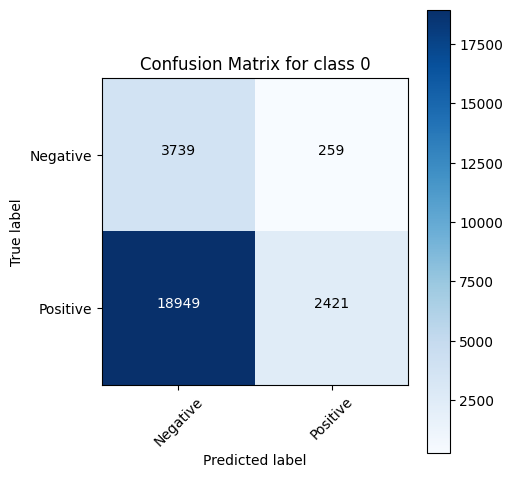

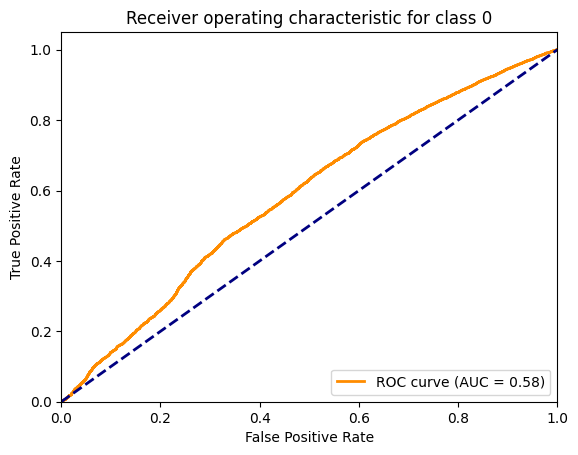

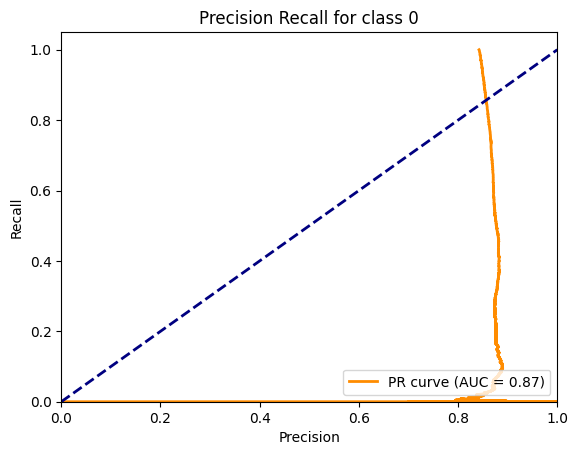

accuracy class 1: 0.22567801955219174
preccision class 1: 0.0
recall class 1: 0.0
f-score class 1: 0.0
auc-pre class 1: 0.01574499017017501
auc-roc class 1: 0.4252258365807347


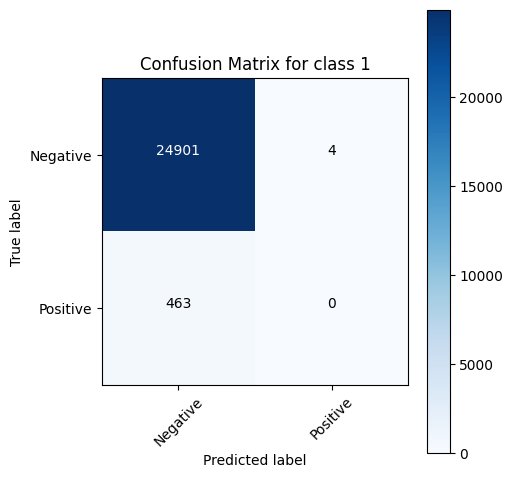

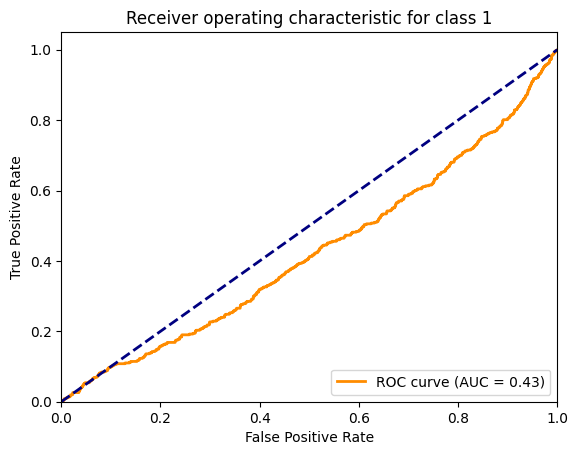

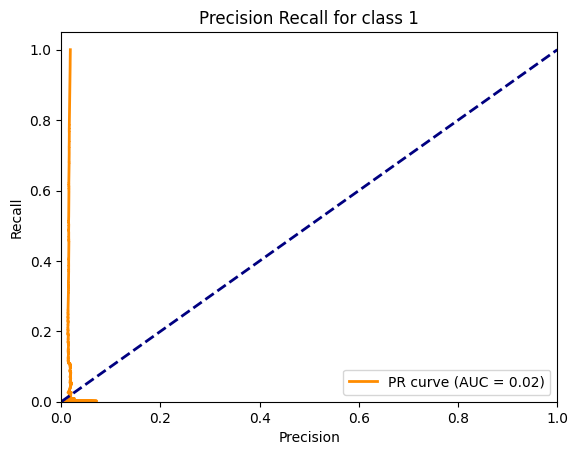

accuracy class 2: 0.22567801955219174
preccision class 2: 0.14565332392876035
recall class 2: 0.9346534653465347
f-score class 2: 0.2520309699073191
auc-pre class 2: 0.22283645542790573
auc-roc class 2: 0.6314523756293028


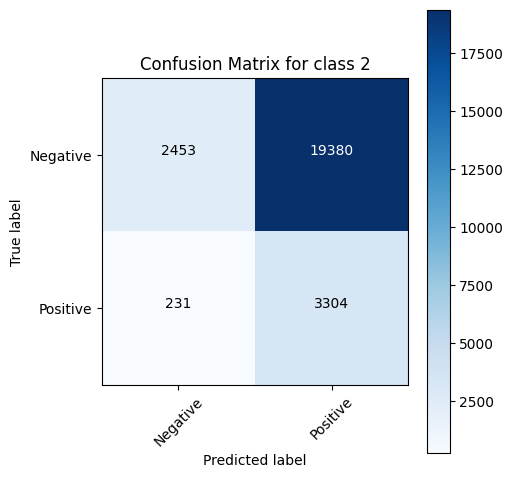

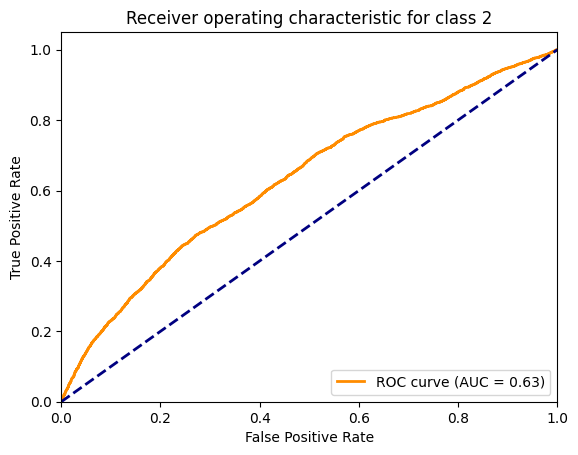

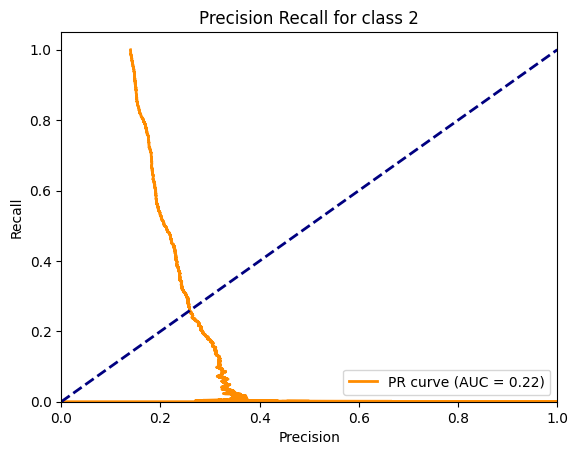

In [9]:
class_metrics = {}

for i in range(3):
    metrics = ClassificationMetrics(y_test, predictions_lrm_test, i, probabilities_lrm_test)
    acc = metrics.accuracy()
    prec = metrics.precision()
    recc = metrics.recall()
    f_score = metrics.f_score()
    auc_pr, _, _ = metrics.auc_pr()
    auc_roc, _, _ = metrics.auc_roc()

    class_metrics[i] = {
        'accuracy' : acc,
        'precision' : prec,
        'recall' : recc,
        'f_score' : f_score,
        'auc_pr' : auc_pr,
        'auc_roc' : auc_roc
        }
    
    print(f'accuracy class {i}: {acc}')
    print(f'preccision class {i}: {prec}')
    print(f'recall class {i}: {recc}')
    print(f'f-score class {i}: {f_score}')
    print(f'auc-pre class {i}: {auc_pr}')
    print(f'auc-roc class {i}: {auc_roc}')
    metrics.plot_confusion_matrix()
    metrics.plot_roc()
    metrics.plot_pr()

## **Random Forest**

In [10]:
clf = RandomForest()
clf.fit(X_train.values, y_train.astype(int).values)
predictions = clf.predict(X_val.values)
probabilities = clf.predict_proba(X_val.values)


100%|██████████| 12/12 [00:58<00:00,  4.91s/tree]


accuracy class 0: 0.5123273248389015
preccision class 0: 0.6056087830163953
recall class 0: 0.609692456536398
f-score class 0: 0.6076437587657784
auc-pre class 0: 0.16626046774618092
auc-roc class 0: 0.5


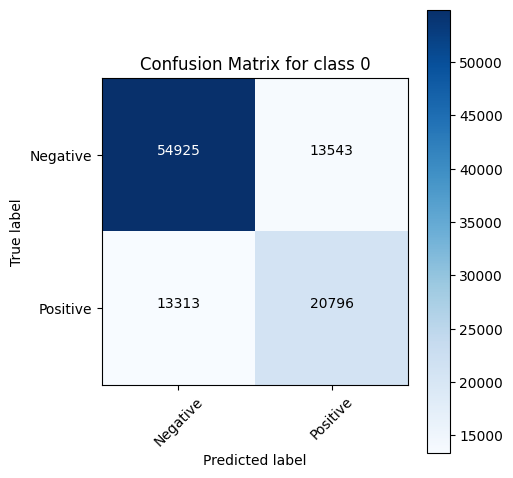

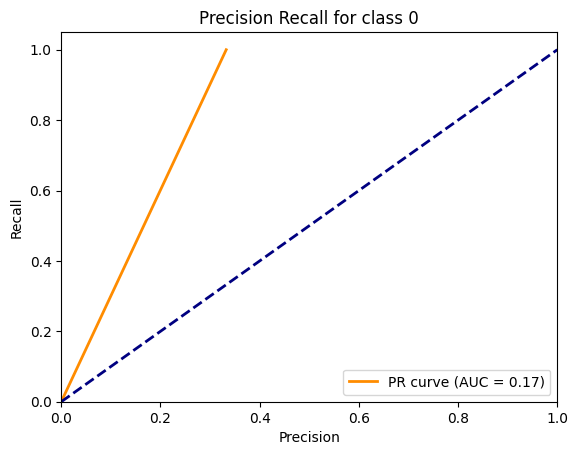

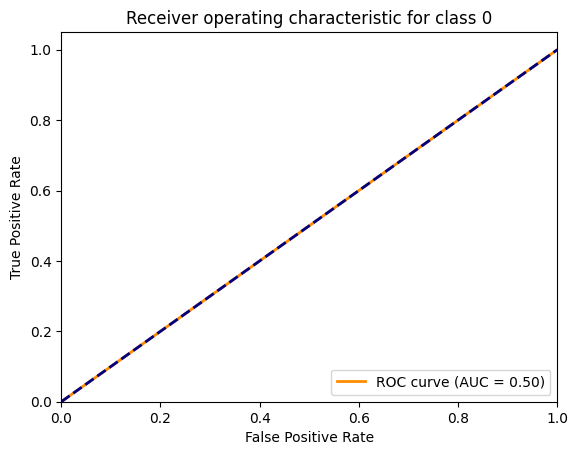

accuracy class 1: 0.5123273248389015
preccision class 1: 0.4191227764213464
recall class 1: 0.2837199693052358
f-score class 1: 0.33837868281178496
auc-pre class 1: 0.16515398188677774
auc-roc class 1: 0.5


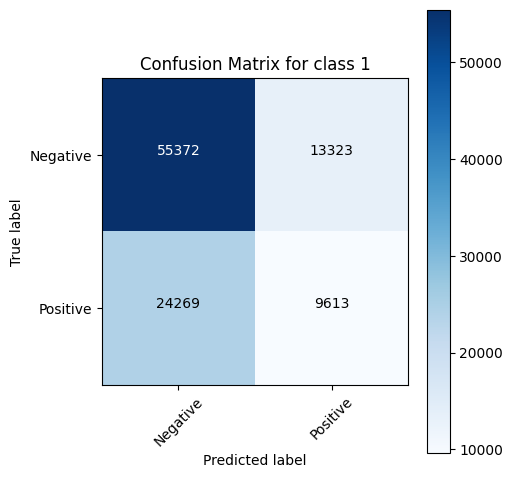

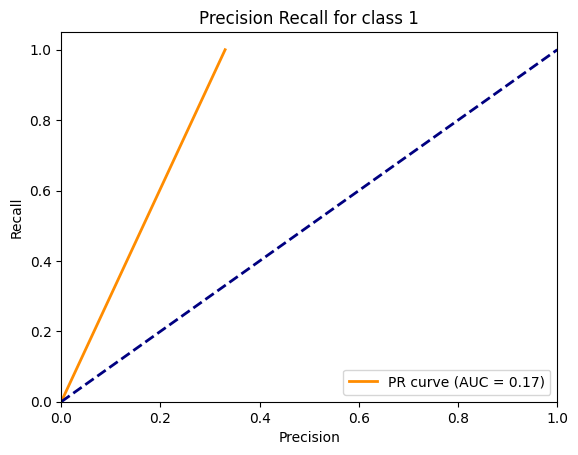

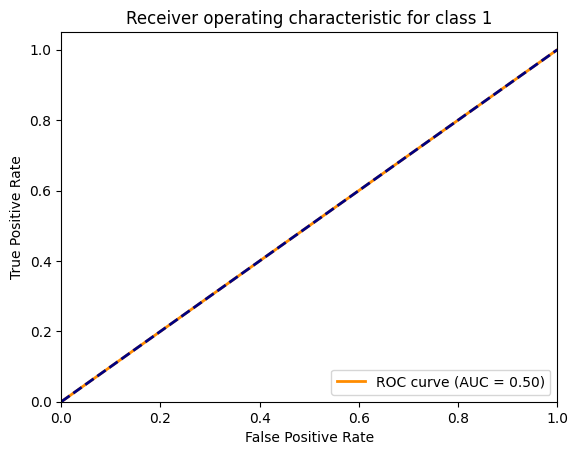

accuracy class 2: 0.5123273248389015
preccision class 2: 0.488808441128427
recall class 2: 0.6402590643613023
f-score class 2: 0.5543761265772081
auc-pre class 2: 0.16858555036704134
auc-roc class 2: 0.5


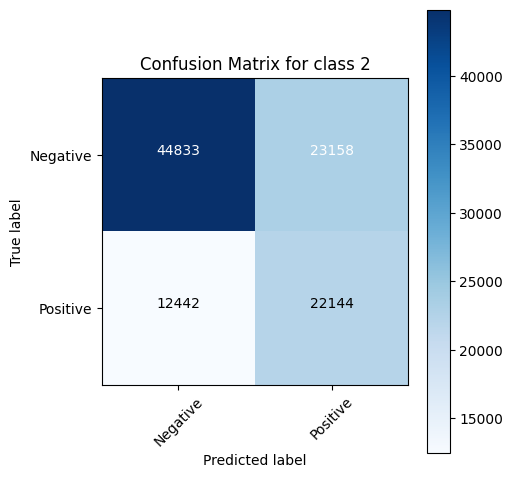

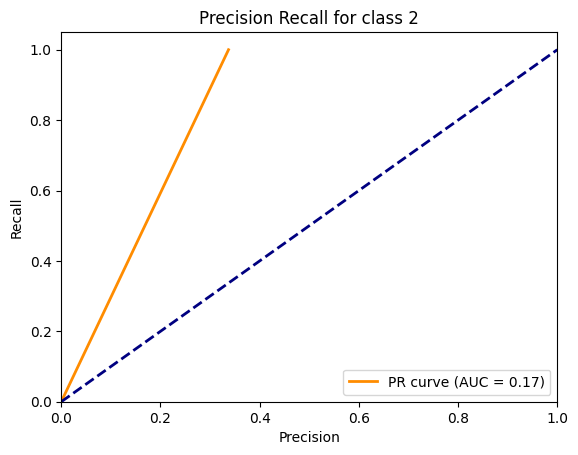

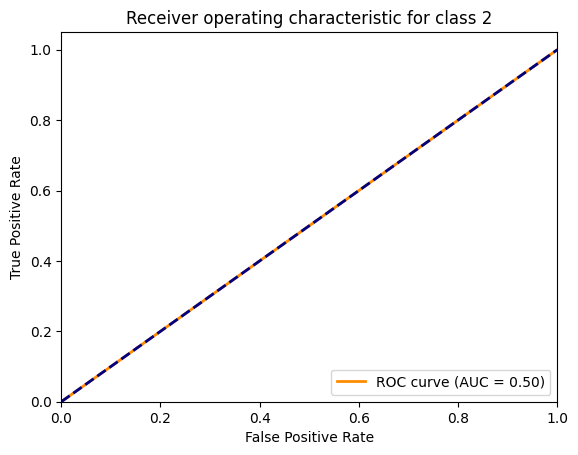

In [11]:
class_metrics = {}

for i in range(3):
    metrics = ClassificationMetrics(y_val, predictions, i, probabilities)
    acc = metrics.accuracy()
    prec = metrics.precision()
    recc = metrics.recall()
    f_score = metrics.f_score()
    auc_pr, _, _ = metrics.auc_pr()
    auc_roc, _, _ = metrics.auc_roc()

    class_metrics[i] = {
        'accuracy' : acc,
        'precision' : prec,
        'recall' : recc,
        'f_score' : f_score,
        'auc_pr' : auc_pr,
        'auc_roc' : auc_roc
        }
    
    print(f'accuracy class {i}: {acc}')
    print(f'preccision class {i}: {prec}')
    print(f'recall class {i}: {recc}')
    print(f'f-score class {i}: {f_score}')
    print(f'auc-pre class {i}: {auc_pr}')
    print(f'auc-roc class {i}: {auc_roc}')
    metrics.plot_confusion_matrix()
    metrics.plot_pr()
    metrics.plot_roc()

In [12]:
predictions_rf_test = clf.predict(X_val.values)
probabilities_rf_test = clf.predict_proba(X_val.values)

In [15]:
class_metrics = {}

for i in range(3):
    metrics = ClassificationMetrics(y_test, predictions_rf_test, i, probabilities_rf_test)
    acc = metrics.accuracy()
    prec = metrics.precision()
    recc = metrics.recall()
    f_score = metrics.f_score()
    auc_pr, _, _ = metrics.auc_pr()
    auc_roc, _, _ = metrics.auc_roc()

    class_metrics[i] = {
        'accuracy' : acc,
        'precision' : prec,
        'recall' : recc,
        'f_score' : f_score,
        'auc_pr' : auc_pr,
        'auc_roc' : auc_roc
        }
    
    print(f'accuracy class {i}: {acc}')
    print(f'preccision class {i}: {prec}')
    print(f'recall class {i}: {recc}')
    print(f'f-score class {i}: {f_score}')
    print(f'auc-pre class {i}: {auc_pr}')
    print(f'auc-roc class {i}: {auc_roc}')
    metrics.plot_confusion_matrix()
    metrics.plot_pr()
    metrics.plot_roc()

ValueError: ('Lengths must match to compare', (25368,), (102577,))